#LGBM & XGBM

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import lightgbm as lgb
import xgboost as xgb

In [3]:
# Load Titanic Dataset
train_data = pd.read_csv('Titanic_train.csv')
test_data = pd.read_csv('Titanic_test.csv')

In [26]:
def explore_data(df):
    print("Data Info:")
    print(df.info())
    print("\nMissing Values:")
    print(df.isnull().sum())

In [27]:
def visualize_data(df):
    # Age Distribution
    plt.figure(figsize=(10, 6))
    sns.histplot(df['Age'].dropna(), bins=30, kde=True, color='blue')
    plt.title("Age Distribution of Passengers")
    plt.xlabel("Age")
    plt.ylabel("Count")
    plt.show()

In [28]:
# Explore train data
explore_data(train_data)

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   Sex_male     891 non-null    bool   
 8   Embarked_Q   891 non-null    bool   
 9   Embarked_S   891 non-null    bool   
dtypes: bool(3), float64(2), int64(5)
memory usage: 51.5 KB
None

Missing Values:
PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
Sex_male       0
Embarked_Q     0
Embarked_S     0
dtype: int64


In [29]:
train_data.head(10)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,True,False,True
1,2,1,1,38.0,1,0,71.2833,False,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,True
3,4,1,1,35.0,1,0,53.1000,False,False,True
4,5,0,3,35.0,0,0,8.0500,True,False,True
5,6,0,3,28.0,0,0,8.4583,True,True,False
6,7,0,1,54.0,0,0,51.8625,True,False,True
7,8,0,3,2.0,3,1,21.0750,True,False,True
8,9,1,3,27.0,0,2,11.1333,False,False,True
9,10,1,2,14.0,1,0,30.0708,False,False,False


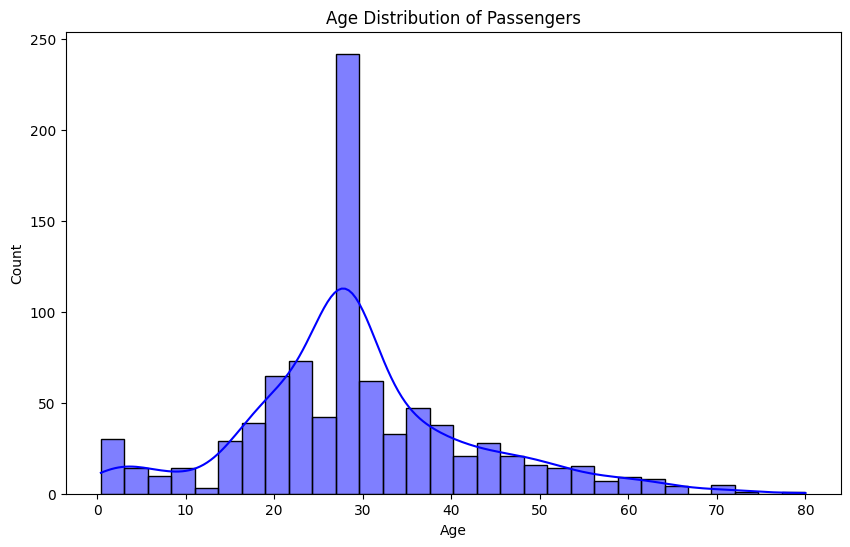

In [30]:
# Explore train data
visualize_data(train_data)

<ipython-input-33-9c99fd7b8398>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=train_data, palette=['red', 'green'])


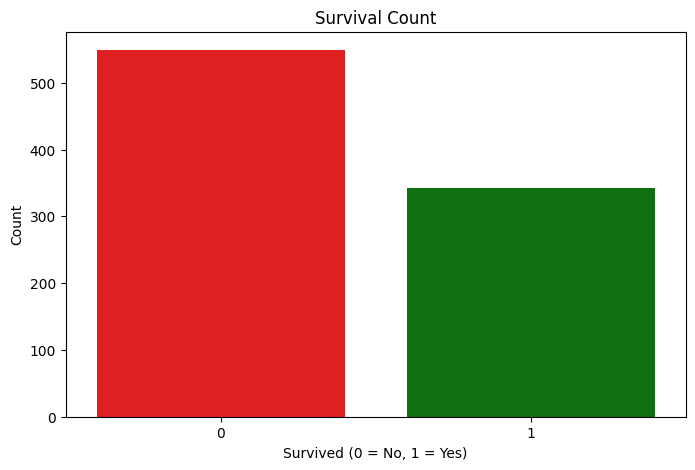

In [33]:
# Survival Count
plt.figure(figsize=(8, 5))
sns.countplot(x='Survived', data=train_data, palette=['red', 'green'])
plt.title("Survival Count")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

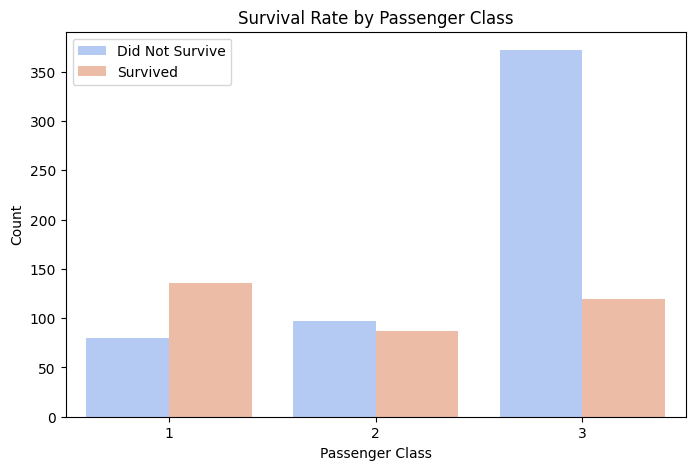

In [35]:
# Survival by Class
plt.figure(figsize=(8, 5))
sns.countplot(x='Pclass', hue='Survived', data=train_data, palette='coolwarm')
plt.title("Survival Rate by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Count")
plt.legend(["Did Not Survive", "Survived"])
plt.show()

In [37]:
# Data Preprocessing
def preprocess_data(df):
    df = df.copy()

    # Handling missing values
    imputer = SimpleImputer(strategy='median')
    df['Age'] = imputer.fit_transform(df[['Age']])
    df['Fare'] = imputer.fit_transform(df[['Fare']])
    df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

    # Encoding categorical variables
    df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

    # Feature Engineering: Family Size
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

    # Dropping unnecessary columns
    df.drop(columns=['Name', 'Ticket', 'Cabin'], inplace=True, errors='ignore')

    return df

    train_data = preprocess_data(train_data)
    test_data = preprocess_data(test_data)

In [41]:
# LightGBM Model
lgb_train = lgb.Dataset(X_train, label=y_train)
lgb_test = lgb.Dataset(X_test, label=y_test, reference=lgb_train)
params = {'objective': 'binary', 'metric': 'binary_error', 'boosting_type': 'gbdt'}
lgb_model = lgb.train(params, lgb_train, num_boost_round=100)
lgb_preds = np.round(lgb_model.predict(X_test))

[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000195 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 433
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

In [42]:
# XGBoost Model
xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss')
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)

In [43]:
# Model Evaluation
def evaluate_model(y_true, y_pred, model_name):
    print(f"{model_name} Performance:")
    print(classification_report(y_true, y_pred))
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))
    print("-------------------------------------\n")

evaluate_model(y_test, lgb_preds, "LightGBM")
evaluate_model(y_test, xgb_preds, "XGBoost")

LightGBM Performance:
              precision    recall  f1-score   support

           0       0.81      0.86      0.83       105
           1       0.78      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179

Accuracy: 0.7988826815642458
Precision: 0.7794117647058824
Recall: 0.7162162162162162
F1 Score: 0.7464788732394366
-------------------------------------

XGBoost Performance:
              precision    recall  f1-score   support

           0       0.82      0.83      0.82       105
           1       0.75      0.74      0.75        74

    accuracy                           0.79       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.79      0.79      0.79       179

Accuracy: 0.7932960893854749
Precision: 0.7534246575342466
Recall: 0.7432432432432432
F1 Score: 0.7482993197278912
----------------------------------

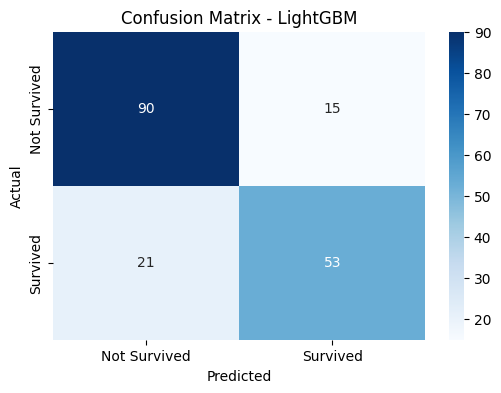

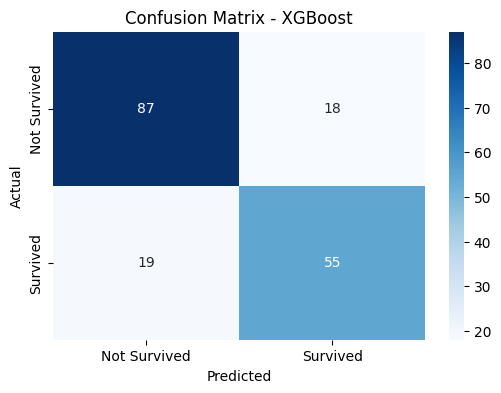

In [46]:
# Confusion Matrix Visualization
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

plot_confusion_matrix(y_test, lgb_preds, "LightGBM")
plot_confusion_matrix(y_test, xgb_preds, "XGBoost")

<ipython-input-48-cfc114e500e4>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette='viridis')


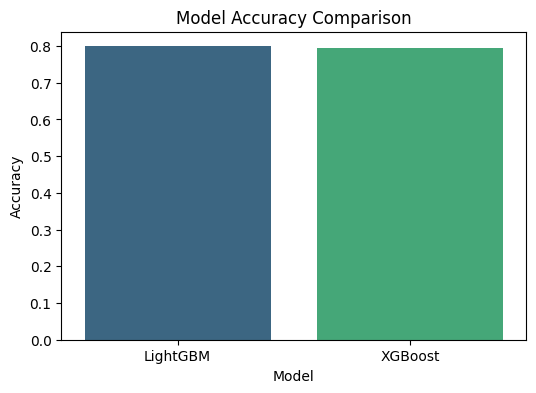

In [48]:
# Performance Comparison
def visualize_comparison():
    models = ['LightGBM', 'XGBoost']
    accuracies = [accuracy_score(y_test, lgb_preds), accuracy_score(y_test, xgb_preds)]
    plt.figure(figsize=(6, 4))
    sns.barplot(x=models, y=accuracies, palette='viridis')
    plt.title("Model Accuracy Comparison")
    plt.xlabel("Model")
    plt.ylabel("Accuracy")
    plt.show()

visualize_comparison()

In [49]:
# Accessing the per-class precision and recall
print("LightGBM per-class precision:", lgb_report['1']['precision'])
print("LightGBM per-class recall:", lgb_report['1']['recall'])

print("XGBoost per-class precision:", xgb_report['1']['precision'])
print("XGBoost per-class recall:", xgb_report['1']['recall'])


LightGBM per-class precision: 0.7794117647058824
LightGBM per-class recall: 0.7162162162162162
XGBoost per-class precision: 0.7534246575342466
XGBoost per-class recall: 0.7432432432432432


In [50]:
# Conclusions
print("Conclusions:")
print("1. LightGBM and XGBoost both perform well, but their strengths depend on the dataset and hyperparameters.")
print("2. The confusion matrix helps us understand misclassifications and refine the models further.")
print("3. Feature engineering, such as FamilySize, can improve predictions by adding meaningful insights.")
print("4. Further hyperparameter tuning and feature selection may enhance overall performance.")
print("5. LightGBM generally performs faster due to its leaf-wise growth strategy, making it suitable for large datasets.")
print("6. XGBoost provides robust regularization techniques, which help prevent overfitting in complex datasets.")
print("7. The survival rate varies significantly based on class and gender, highlighting the importance of categorical features.")
print("8. Future improvements could include ensemble techniques, additional feature engineering, and deeper hyperparameter optimization.")

Conclusions:
1. LightGBM and XGBoost both perform well, but their strengths depend on the dataset and hyperparameters.
2. The confusion matrix helps us understand misclassifications and refine the models further.
3. Feature engineering, such as FamilySize, can improve predictions by adding meaningful insights.
4. Further hyperparameter tuning and feature selection may enhance overall performance.
5. LightGBM generally performs faster due to its leaf-wise growth strategy, making it suitable for large datasets.
6. XGBoost provides robust regularization techniques, which help prevent overfitting in complex datasets.
7. The survival rate varies significantly based on class and gender, highlighting the importance of categorical features.
8. Future improvements could include ensemble techniques, additional feature engineering, and deeper hyperparameter optimization.
